In [ ]:
"""
베이즈 정리란?
A사건이 일어날 확률과 B사건이 일어날 확률이 있다고 가정해보자
A,B 두사건이 동시에 일어날 확률을 구할 때 우리는 먼저 이 두 사건이 서로 독립인지 아닌지 판단해야한다.
독립일 경우 단순하게 P(A) * P(B)를 해주면 된다. (독립이란 각각의 사건이 서로의 일어날 확률에 영향을 주지 않는 것을 의미)
하지만 서로 영향을 주는 경우도 있기 때문에 우리는 조건부 확률(P(B|A))을 고려해 주어야한다.
이것을 고려한 계산식이 P(A) * P(B|A)이다. 이 계산식에서 P(A)를 사전조건 P(B|A)를 사후조건이라 한다.

A사건이 먼저 일어난 후 B사건이 일어날 확률은 곧 두 사건의 교집합과 같다. (= P(A∩B))
반대의 경우도 생각해보자 B사건이 먼저 일어난 후 A사건이 일어날 확률도 두 사건의 교집합과 같다.
왜냐하면 두 사건의 교집합은 두 사건이 일어날 확률이기 때문이다. 이것을 베이즈 정리라고 한다.
P(A)P(B|A) = P(B)P(A|B)
광고라는 단어가 있을 때 스팸 메일일 확률을 구하기 위해 베이즈 정리를 이용하면
P(스팸메일|광고) = P(스팸메일)P(광고|스팸메일)/P(광고)가 된다.

하지만 현실적으로 동시 다발적으로 발생하는 P(광고)와 같이 일일히 구할 수 없는 확률이 있는 경우가 많다.
그래서 그러한 구할 수 없는 확률들은 의미가 없다고 가정하고 없애자는 이론이 '나이브 베이즈'이다.
그래서 식을 정리해 보면 P(스팸메일|광고) = P(스팸메일)P(광고|스팸메일)이 된다.

스팸 분류를 위한 필터링 단어를 X라고 해보자. X단어가 등장할 경우 스팸일 확률을 구하는 것이 목표이다.
P(스팸메일|X) = P(스팸메일)P(X|스팸메일)이 된다.
여기서 P(X|스팸메일)은 스팸메일에서 X단어가 모두 있을 확률을 의미한다.
따라서 P(X|스팸메일) = P(X1|스팸메일)*P(X2|스팸메일)*...*P(Xn|스팸메일) (n은 X의 원소 개수)이 된다.
이러한 원리로 긴 텍스트를 단어 단위로 쪼개서 텍스트의 뤼앙스를 예측하거나 주제를 분류할 수 있다.
나이브 베이즈 분류 = Classification
"""

In [100]:
import pandas as pd
%matplotlib inline
import matplotlib

In [13]:
# 문자열을 분석하고 encording type을 예측해주는 모듈
import chardet
# pip install chardet
# chardet.detect(bite string data) --> dictionary로 반환, 속성 : encoding, confidence, language이는 각각 인코딩 형식 예측 결과, 신뢰도, 언어를 뜻함

# open data , 영화리뷰데이터 binary type으로 읽기 >> 보통 이미지나 영상을 읽어올 때 사용한다.
# 여기서는 chardet를 사용하여 encording type을 예측하기 위해 rb로 읽어올 것이다. (읽어오는데 시간 오래 걸림)
with open("imdb_master.csv", 'rb') as f: 
    result = chardet.detect(f.read()) 

In [71]:
train = pd.read_csv("imdb_master.csv", encoding=result['encoding'])
print(train.head())
train = train.drop(train.columns[[0, 1, 4]], axis=1)
print(train)
train.label = [(l!='neg')*1 for l in train.label]  # label명이 neg면 0, 그 외의 것들은 1로 가공
train.head()

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  
                                                  review  label
0      Once again Mr. Costner has dragged out a movie...    neg
1      This is an example of why the majority of acti...    neg
2      First of all I hate those moronic rappers, who...    neg
3      Not even the Beatles could write songs everyon...    neg
4      Brass pictures (movies is not a fitting word f...    neg
...                              

,review,label
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [74]:
train.columns = ['user_review' , 'positive'] # column명 변경
train.head() 

,user_review,positive
0,Once again Mr. Costner has dragged out a movie...,0
1,This is an example of why the majority of acti...,0
2,"First of all I hate those moronic rappers, who...",0
3,Not even the Beatles could write songs everyon...,0
4,Brass pictures (movies is not a fitting word f...,0


In [75]:
# 트레이닝셋과 테스트셋으로 나눈다. 
split = 0.7
d_train = train[:int(split*len(d))] # 전체 데이터의 70%만 저장 = 훈련 데이터
d_test = train[int((1-split)*len(d)):] # 전체 데이터의 30%만 저장 = 검증 데이터

In [78]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer() : 단어들을 모두 소문자로 바꾸고 단어의 카운트(출현 빈도(frequency))로 여러 단어들을 벡터화하는 함수. (카운트 행렬, 단어 문서 행렬화)
vectorizer = CountVectorizer() # default값
features = vectorizer.fit_transform(d_train.user_review) # vectorizer안에는 단어들을 벡터화한 이름들이 들어가게 되고, transform한 결과인 features에는 행별 문자열 안에서 단어별 사용 빈도수를 저장
features

<70000x121229 sparse matrix of type '<class 'numpy.int64'>'
	with 9598445 stored elements in Compressed Sparse Row format>

In [85]:
# 총 벡터화 된 문자의 개수와 벡터화된 이름들 출력, 총 약 12만개의 문자가 있음을 알 수 있음
len(vectorizer.get_feature_names_out()) , vectorizer.get_feature_names_out()

(121229,
 array(['00', '000', '0000', ..., 'ð³ð', 'ðºð½ð', 'ð¾ð¼'], dtype=object))

In [84]:
# 문자 벡터화 사전 안에 기록된 30001번~30031번에 있는 단어가 101번째~131번째 문자열에서 출현한 빈도수가 어떻게 되는지 확인해보기
i = 30000
j = 100
words = vectorizer.get_feature_names_out()[i:i+30] # 3만1번째 단어 ~ 3만31번째 단어까지의 단어 이름 추출
pd.DataFrame(features[j:j+10,i:i+30].todense(), columns=words) # 101행의 문자열~131행의 문자열에서 사용한 단어 빈도수 추출

,dimanche,dimartino,dimas,dimbleby,dimbulb,dime,dimeco,dimension,dimensional,dimensionality,...,diminution,diminutive,dimitri,dimitriades,dimitrij,dimitrios,dimitrius,dimitrova,dimitru,dimitry
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [14]:
words # 30001번째~30031번째로 저장된 단어 이름들

['dimanche',
 'dimartino',
 'dimas',
 'dimbleby',
 'dimbulb',
 'dime',
 'dimeco',
 'dimension',
 'dimensional',
 'dimensionality',
 'dimensionally',
 'dimensionless',
 'dimensions',
 'dimentional',
 'dimes',
 'dimestore',
 'diminish',
 'diminished',
 'diminishes',
 'diminishing',
 'diminution',
 'diminutive',
 'dimitri',
 'dimitriades',
 'dimitrij',
 'dimitrios',
 'dimitrius',
 'dimitrova',
 'dimitru',
 'dimitry',
 'dimly',
 'dimmed',
 'dimmer',
 'dimmest',
 'dimmick',
 'dimming',
 'dimmock',
 'dimmsdale',
 'dimness',
 'dimple',
 'dimpled',
 'dimples',
 'dimply',
 'dims',
 'dimsdale',
 'dimtri',
 'dimwit',
 'dimwited',
 'dimwits',
 'dimwitted',
 'din',
 'dina',
 'dinaggio',
 'dinaggioi',
 'dinah',
 'dinahs',
 'dinamite',
 'dinamo',
 'dinasours',
 'dinasty',
 'dincht',
 'dind',
 'dindal',
 'dindo',
 'dine',
 'dined',
 'dinehart',
 'dinelli',
 'diner',
 'dinero',
 'diners',
 'dinerâ',
 'dines',
 'dinesen',
 'ding',
 'dingaling',
 'dingbat',
 'dingbats',
 'dinged',
 'dinghy',
 'dingiest',

In [86]:
from sklearn.naive_bayes import MultinomialNB
# Naive bayes 모델을 정의해보자
model1 = MultinomialNB()
model1.fit(features, d_train.positive) # 모델 학습

pred1 = model1.predict_proba(vectorizer.transform(d_test.user_review)) # 검증 데이터로 예측해보기
pred1 , pred1.shape # pred1에서 0번째 컬럼값들은 부정이 될 확률, 1번째 컬럼값들은 긍정이 될 확률

(array([[1.00000000e+00, 1.89777939e-11],
        [9.99999967e-01, 3.29460894e-08],
        [9.99885531e-01, 1.14468753e-04],
        ...,
        [1.00000000e+00, 4.71360351e-10],
        [7.08223976e-01, 2.91776024e-01],
        [1.44847203e-12, 1.00000000e+00]]),
 (70000, 2))

In [97]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve

def performance(y_true, pred, color="g", ann=True):
    acc = accuracy_score(y_true, pred[:,1] > 0.5) # 모델의 정확도
    auc = roc_auc_score(y_true, pred[:,1]) # 민감도와 특이도로 그려지는 Curve 그래프의 선 밑부분의 면적, 1에 가까울 수록 완벽한 모델이다.
    fpr, tpr, thr = roc_curve(y_true, pred[:,1])
    plot(fpr, tpr, color, linewidth="3")
    xlabel("False positive rate")
    ylabel("True positive rate")
    if ann:
        annotate("Acc: %0.2f" % acc, (0.1,0.8), size=14) # 범주 표기
        annotate("AUC: %0.2f" % auc, (0.1,0.7), size=14)

In [106]:
d_test.positive, pred1[:, :1] > 0,5

(30000    0
 30001    0
 30002    0
 30003    0
 30004    0
         ..
 99995    1
 99996    1
 99997    1
 99998    1
 99999    1
 Name: positive, Length: 70000, dtype: int64,
 array([[ True],
        [ True],
        [ True],
        ...,
        [ True],
        [ True],
        [ True]]),
 5)

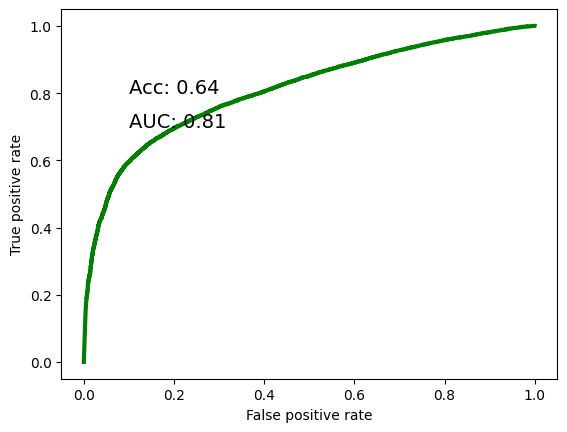

In [101]:
performance(d_test.positive, pred1)

In [112]:
1 == True # Python에서 True는 1을, False는 0을 나타냄을 알 수 있다.
0 == False 

False